In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
%matplotlib inline

In [133]:
#Battery
Engine_Dim = 20
Battery_Dim = 10

# Hilbert space is oscillator x battery_l x battery_k
a = tensor(destroy(Engine_Dim),  identity(Battery_Dim),          identity(Battery_Dim)          )
L = tensor(identity(Engine_Dim), Qobj(np.eye(Battery_Dim,k=+1)), identity(Battery_Dim)          )
K = tensor(identity(Engine_Dim), identity(Battery_Dim),          Qobj(np.eye(Battery_Dim,k=+1)) )

N = a.dag()*a
NL = tensor(identity(Engine_Dim), num(Battery_Dim),      identity(Battery_Dim) )
NK = tensor(identity(Engine_Dim), identity(Battery_Dim), num(Battery_Dim)      )

In [134]:
#Engine + Battery

#Engine Operators
#A = tensor(a,qeye(Battery_Dim**2))
#C = tensor(c,qeye(Battery_Dim**2))

#Battery Operators
#LU = tensor(qeye(2)qeye(2*Engine_Dim),Lup)
#LD = tensor(qeye(2*Engine_Dim),Ldown)
#KU = tensor(qeye(2*Engine_Dim),Kup)
#KD = tensor(qeye(2*Engine_Dim),Kdown)
#NL = tensor(qeye(2*Engine_Dim),NumL)
#NK = tensor(qeye(2*Engine_Dim),NumK)

In [135]:
#Hamiltonian of Engine
omega = 1.0
H_e = omega*a.dag()*a

#Hamiltonian of battery
omega_m = 1.0
H_b = omega_m*(NL+NK)

#Interaction Hamiltonian
Coupling = 2.0
H_I = L.dag()*a + a.dag()*L

# Total Hamiltonian
H = H_e + H_b + H_I

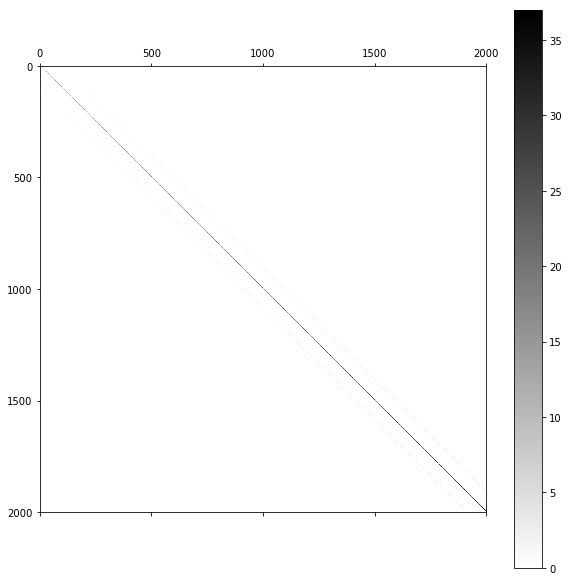

In [138]:
plt.figure(1,figsize=[10,10])
plt.matshow(np.real(H.data.toarray()),fignum=1, cmap=plt.cm.gray_r)
plt.colorbar()
#np.real(H.data.toarray())

In [43]:
def battery(j,k,Dim=1000):
    l=j-k
    state = tensor( basis(Dim,l), basis(Dim,k) )
    return state

def ket_battery(state):
    l = expect(NumL,state)
    k = expect(NumK,state)
    return l+k,k

In [44]:
mystate = battery(1,1,Dim=5)
ket_battery(mystate)

(1.0, 1.0)

In [50]:
ket_battery(Ldown*Kup*Kup*Kup*mystate)

(0.0, 0.0)

In [53]:
omega_m = 1
H = omega_m*(NumL+NumK)

In [57]:
expect(H,battery(4,3))

4.0

In [10]:
state2 = Lup*newstate
ket_battery(state2)

(2.0, 1.0)

In [11]:
state2.dag()*Lup*Ldown*state2

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[ 1.]]

In [73]:
l.data.toarray()[0][0].real

0.0

In [129]:
import sys
print(sys.version)

3.5.2 |Anaconda 4.3.0 (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
